# Regresión polinómica

En muchas ocasiones, la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaría muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


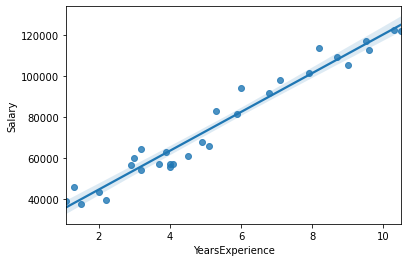

In [2]:
sns.regplot(data = df,
           x = "YearsExperience",
           y="Salary");

El problema es que en la vida real, los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [3]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

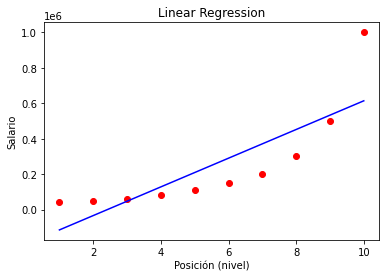

In [6]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Posición (nivel)')
    plt.ylabel('Salario')
    plt.show()
    return
viz_linear()

En este punto, te podrás preguntar por qué no hemos hecho la separación entre train y test. En este caso, se dan varios factores: el principal, que lo que estamos haciendo es algo rápido para ver que realmente no tiene una distribución aproximable por una recta, y en segundo lugar, que tenemos muy pocos datos (aunque veremos técnicas para combatir con esto).

### EJERCICIO

1. Utiliza todos los datos para entrenar y calcula las métricas de entrenamiento de este modelo, así como sus estadísticos más importantes.

In [7]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X, y)

predictions = lin_reg.predict(X)

# Métricas:
print("MAE:", metrics.mean_absolute_error(y, predictions))
print("MSE:", metrics.mean_squared_error(y, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y, predictions)))

# print("R^2 (train):", lin_reg.score(X_train, y_train))
print("R^2:", lin_reg.score(X, y))

# Estadísticos con statsmodels:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

MAE: 128454.54545454546
MSE: 26695878787.878784
RMSE: 163388.73519272613
R^2: 0.6690412331929895
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Fri, 22 Jan 2021   Prob (F-statistic):            0.00383
Time:                        16:26:01   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\TheBridge\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas. Por ejemplo, podríamos probar a darle un toque no lineal añadiendo potencias de las variables:

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. Si degree = 3 y tenemos dos features (a, b), realizará a^2, b^2, b^3, b^3, ab, a^2b, ab^2.

En este caso, al contar con solo una variable (a), si seleccionamos un degree=3, obtendremos: 1 + a + a^2 + a^3:

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X)
X_poly = poly_reg.transform(X)

In [11]:
X_poly # grados 0, 1, 2 y 3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [12]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

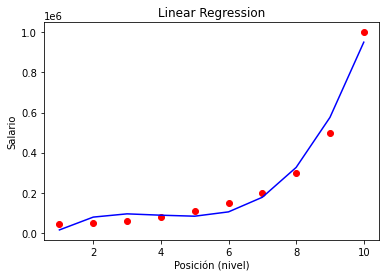

In [13]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Posición (nivel)')
    plt.ylabel('Salario')
    plt.show()
    return
viz_polymonial()

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [101]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [102]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [103]:
poly_reg.transform([[5.5]])

array([[  1.   ,   5.5  ,  30.25 , 166.375]])

In [104]:
print(lin_reg.predict([[5.5]]))

print(pol_reg.predict(poly_reg.transform([[5.5]])))

[249500.]
[89187.50000001]


### EJERCICIO

1. Lee el dataset "desinteg_part.csv" de la carpeta data que está dentro de esta misma carpeta y realiza un pequeño gráfico de dispersión
2. Haz la separación en train y test, y calcula las métricas de este modelo.
3. En base a lo que acabas de calcular, y la gráfica anterior, ¿crees que podrías mejorar con una regresión polinómica? Si es así, impleméntala (con el grado que quieras) y compara los resultados.

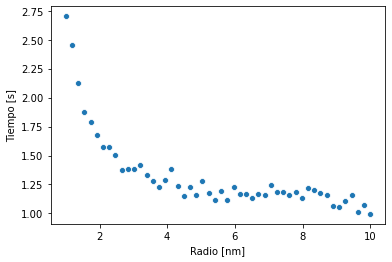

In [17]:
df = pd.read_csv("data/desinteg_part.csv", sep=';')
sns.scatterplot(x=df['Radio [nm]'], y=df['Tiempo [s]']);

In [2]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.iloc[:, :1]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

# Métricas:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# print("R^2 (train):", lin_reg.score(X_train, y_train))
print("R^2:", lin_reg.score(X_test, y_test))

# Estadísticos con statsmodels:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

NameError: name 'df' is not defined

In [ ]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train)
X_poly = poly_reg.transform(X_train)
X_poly_test = poly_reg.transform(X_test)
X_poly


In [20]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [27]:
predictions = pol_reg.predict(X_poly_test)

# Métricas:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# print("R^2 (train):", lin_reg.score(X_train, y_train))
print("R^2:", pol_reg.score(X_poly_test, y_test))

MAE: 0.05664139639301169
MSE: 0.004708774094449485
RMSE: 0.06862050782710287
R^2: 0.9171000437408885
